Install and Import Dependencies

In [19]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [7]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, force_reload=True)
model

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\shahk/.cache\torch\hub\master.zip
YOLOv5  2023-4-11 Python-3.9.11 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [3]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'


In [20]:
# results = model(img)

In [4]:
results = model('Traffic.jpg')
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 141.6ms pre-process, 108.2ms inference, 85.6ms NMS per image at shape (1, 3, 448, 640)


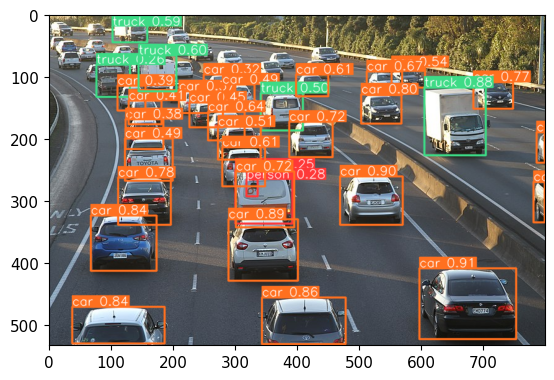

In [5]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

In [6]:
cap = cv2.VideoCapture(0)


In [7]:
print(cap.isOpened())

True


In [8]:
ret, frame = cap.read()

In [9]:
print(frame)

[[[ 0  4 34]
  [ 0  6 36]
  [ 0  4 34]
  ...
  [ 0  2 13]
  [ 0  5 19]
  [ 0  6 21]]

 [[ 0  4 34]
  [ 0  4 34]
  [ 0  3 33]
  ...
  [ 0  0 11]
  [ 0  6 19]
  [ 0  8 22]]

 [[ 0  4 34]
  [ 0  4 34]
  [ 0  4 34]
  ...
  [ 0  0 11]
  [ 0  5 19]
  [ 0  6 21]]

 ...

 [[ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]
  ...
  [ 0  0  7]
  [ 0  0  7]
  [ 0  0  7]]

 [[ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]
  ...
  [ 0  0  7]
  [ 0  0  7]
  [ 0  0  7]]

 [[ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]
  ...
  [ 0  0  7]
  [ 0  0  7]
  [ 0  0  7]]]


Real Time Detections

In [14]:
cap = cv2.VideoCapture('Workers.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    
    results = model(frame)# Make detections  using yolo model
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Train from scratch

In [11]:
!cd yolov5 && python train.py --img 320 --batch 8 --epochs 1 --data dataset.yml --weights yolov5s.pt --workers 0

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=1, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 5 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'D:\Sapienza\Object': No such file or directory
YOLOv5  2023-4-9 Python-3.9.11 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, wa

loading costom trained model

In [26]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp16/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\shahk/.cache\torch\hub\master.zip
YOLOv5  2023-4-11 Python-3.9.11 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [35]:
results = model('test.jpg')

In [36]:
results.print()

image 1/1: 480x639 (no detections)
Speed: 16.0ms pre-process, 105.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


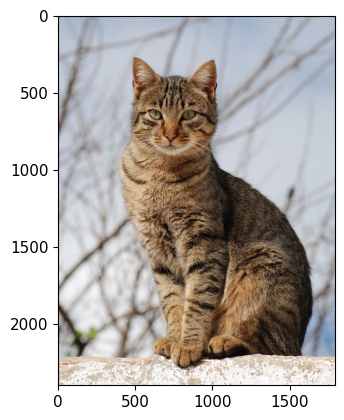

In [33]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()